<center><div style="font-size : 20px; font-weight : bold; color : darkbue;">PENGANTAR DATA SCIENCE</div>
<div>Eksplorasi Dataset Banking</div>
<hr>
<div>6182001004 | William Surya Wijaya - 6182001005 | Kae Zarren L H - 6182001042 | Ester Oka N</div>

In [4]:
#import library
import pandas as pd; from matplotlib import pyplot as plt; import requests;

In [5]:
#import and load dataset
url = ['https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/BANK_INFO.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/BANK_TELCO_ID.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/AGGREGATED_TELCO_TRANSACTIONS.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/banking-dt/MOBILE_OS.csv'];

bankInfo = pd.read_csv(url[0], sep=",", encoding='cp1252');
bankTelcoId = pd.read_csv(url[1], sep=",", encoding='cp1252');
aggrTelcoTrans = pd.read_csv(url[2], sep=",", encoding='cp1252');
mobileOS = pd.read_csv(url[3], sep=",", encoding='cp1252');

<center><div style="font-weight : bold">bank Info Dataset</div></center>
<hr>

In [6]:
print(list(bankInfo.columns));

['BANK_ID', 'AGE', 'MARITAL_STATUS', 'GENDER', 'EDUCATION', 'STATE', 'OCCUPATION', 'OCC_DESC']


In [7]:
print('\n[?] Any (null) value ?',bankInfo.isnull().values.any());

for col in bankInfo.columns:
    print('[!]',col,'\n    Unique Value : ',bankInfo[col].dropna().unique(),'\n    Unique Total : ',len(bankInfo[col].unique()),'\n    Any (null) value at',col,'?',bankInfo[col].isnull().values.any());


[?] Any (null) value ? True
[!] BANK_ID 
    Unique Value :  [13398 16152 18560 ... 25694 26112 26929] 
    Unique Total :  13199 
    Any (null) value at BANK_ID ? False
[!] AGE 
    Unique Value :  [42 37 34 26 25 31 29 28 58 56 55 53 51 50 49 48 47 46 45 44 43 41 40 38
 36 35 33 32 30 27 24 23 57 52 39 54 22 21 59] 
    Unique Total :  39 
    Any (null) value at AGE ? False
[!] MARITAL_STATUS 
    Unique Value :  ['Single' 'Married' 'Divorced' 'Not Applicable / Blank' 'Widow'] 
    Unique Total :  5 
    Any (null) value at MARITAL_STATUS ? False
[!] GENDER 
    Unique Value :  ['Male' 'Female'] 
    Unique Total :  2 
    Any (null) value at GENDER ? False
[!] EDUCATION 
    Unique Value :  ['No Formal Education / Unknown' 'College/ University' 'Secondary'
 'Bachelor' 'Professional' 'Primary' 'Doctorate' 'Diploma' 'Masters'] 
    Unique Total :  10 
    Any (null) value at EDUCATION ? True
[!] STATE 
    Unique Value :  ['Selangor Darul Ehsan' 'Negeri Sembilan Darul Khusus' 'Keda

In [8]:
#fix dataset

#fix bankInfo column name
fixedBankInfo = bankInfo[(bankInfo != 0).all(axis=1)];
fixedBankInfo = fixedBankInfo.dropna(axis=0);

In [9]:
print('[?] Any (null) value ?', fixedBankInfo.isnull().values.any(),'\n');

for col in fixedBankInfo.columns:
    print('[!]',col,'\n    Unique Value : ',fixedBankInfo[col].dropna().unique(),'\n    Unique Total : ',len(fixedBankInfo[col].unique()),'\n    Any (null) value at',col,'?',fixedBankInfo[col].isnull().values.any());

[?] Any (null) value ? False 

[!] BANK_ID 
    Unique Value :  [13398 16152 18560 ... 24759 25694 26929] 
    Unique Total :  10636 
    Any (null) value at BANK_ID ? False
[!] AGE 
    Unique Value :  [42 37 34 31 29 28 58 56 55 53 51 50 49 48 47 46 45 44 43 41 40 38 36 35
 33 32 30 27 26 25 24 23 52 39 54 22 57 59] 
    Unique Total :  38 
    Any (null) value at AGE ? False
[!] MARITAL_STATUS 
    Unique Value :  ['Single' 'Married' 'Divorced' 'Not Applicable / Blank' 'Widow'] 
    Unique Total :  5 
    Any (null) value at MARITAL_STATUS ? False
[!] GENDER 
    Unique Value :  ['Male' 'Female'] 
    Unique Total :  2 
    Any (null) value at GENDER ? False
[!] EDUCATION 
    Unique Value :  ['No Formal Education / Unknown' 'College/ University' 'Secondary'
 'Bachelor' 'Professional' 'Primary' 'Doctorate' 'Diploma' 'Masters'] 
    Unique Total :  9 
    Any (null) value at EDUCATION ? False
[!] STATE 
    Unique Value :  ['Selangor Darul Ehsan' 'Negeri Sembilan Darul Khusus'
 'Pera

In [22]:
# pie chart
fixedBankInfo[fixedBankInfo.columns["GENDER"]].sum().plot(kind='pie', figsize=(6,6), autopct='%1.0f%%', subplots=False); plt.show();
fixedBankInfo.groupby('GENDER')['GENDER'].count().plot.pie(autopct='%.2f',figsize=(5,5))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<center><div style="font-weight : bold">bank Telco Id</div></center>
<hr>

In [10]:
print(list(bankTelcoId.columns));

['BANK_ID', 'TELCO_ID']


In [11]:
print('[?] Any (null) value ?',bankTelcoId.isnull().values.any(),'\n');

for col in bankTelcoId.columns:
    print('[!]',col,'\n    Unique Value : ',bankTelcoId[col].dropna().unique(),'\n    Unique Total : ',len(bankTelcoId[col].unique()),'\n    Any (null) value at',col,'?',bankTelcoId[col].isnull().values.any())

[?] Any (null) value ? False 

[!] BANK_ID 
    Unique Value :  [12140 17875 12935 ... 10930 28852 15928] 
    Unique Total :  16080 
    Any (null) value at BANK_ID ? False
[!] TELCO_ID 
    Unique Value :  ['C-42552' 'C-50147' 'C-43558' ... 'C-52471' 'C-64179' 'C-47498'] 
    Unique Total :  22200 
    Any (null) value at TELCO_ID ? False


<center><div style="font-weight : bold">bank Telco Trans</div></center>
<hr>

In [12]:
print(list(aggrTelcoTrans.columns));

['TELCO_ID', 'PREPAID_AMT_MTH_1', 'PREPAID_AMT_MTH_2', 'PREPAID_AMT_MTH_3', 'PREPAID_AMT_MTH_4', 'PREPAID_AMT_MTH_5', 'PREPAID_AMT_MTH_6', 'POSTPAID_AMT_MTH_1', 'POSTPAID_AMT_MTH_2', 'POSTPAID_AMT_MTH_3', 'POSTPAID_AMT_MTH_4', 'POSTPAID_AMT_MTH_5', 'POSTPAID_AMT_MTH_6', 'TOTAL_POSTPAID_AMT', 'TOTAL_PREPAID_AMT', 'AVG_POSTPAID_AMT', 'AVG_PREPAID_AMT']


In [13]:
print('[?] Any (null) value ?',aggrTelcoTrans.isnull().values.any(),'\n');

for col in aggrTelcoTrans.columns:
    print('[!]',col,'\n    Unique Value : ',aggrTelcoTrans[col].dropna().unique(),'\n    Unique Total : ',len(aggrTelcoTrans[col].unique()),'\n    Any (null) value at',col,'?',aggrTelcoTrans[col].isnull().values.any())

[?] Any (null) value ? False 

[!] TELCO_ID 
    Unique Value :  ['C-42552' 'C-43558' 'C-44626' ... 'C-52145' 'C-47116' 'C-54639'] 
    Unique Total :  6700 
    Any (null) value at TELCO_ID ? False
[!] PREPAID_AMT_MTH_1 
    Unique Value :  [ 100.    300.      0.     25.     12.5    50.     37.5   175.    200.
  225.     62.5   575.     75.     87.5   125.    150.     56.25  350.
  106.25  187.5     6.25   68.75  325.    156.25  212.5   312.5   262.5
  450.     18.75  162.5   118.75  437.5    43.75  375.    425.    337.5
   31.25  250.     93.75  525.    562.5   112.5   862.5   275.    387.5
  475.    256.25  362.5    81.25  137.5   168.75  287.5   493.75  131.25
  143.75  687.5   462.5   500.    537.5   237.5   875.    281.25 1037.5
  318.75  825.    700.    431.25  218.75  975.    412.5   181.25  400.
  550.    206.25  368.75  406.25  675.    800.    268.75  193.75  306.25
  443.75  625.    750.    600.    356.25  487.5   650.    587.5   581.25
 1275.    293.75  612.5   331.25  243.

<center><div style="font-weight : bold">mobile OS Dataset</div></center>
<hr>

In [14]:
print(list(mobileOS.columns));

['BANK_ID', 'MOBILE', 'TABLET', 'samsung', 'OPPO', 'HUAWEI', 'SONY', 'XIAOMI', 'LENOVO', 'ASUS', 'VIVO', 'ANDROID', 'IPHONE_IOS11']


In [15]:
#fix dataset

#fix mobileOS column name
mobileOS.rename(columns={'samsung' : 'SAMSUNG'}, inplace=True);

In [16]:
#check mobileOS columns value
for col in mobileOS.columns:
    print('[!]',col,'\n    Unique Value : ',mobileOS[col].unique(),'\n    Unique Total : ',len(mobileOS[col].unique()))

print('\n[?] Any (null) value ?',mobileOS.isnull().values.any());

[!] BANK_ID 
    Unique Value :  [10001 10002 10004 ... 29330 29331 29332] 
    Unique Total :  15005
[!] MOBILE 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] TABLET 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] SAMSUNG 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] OPPO 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] HUAWEI 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] SONY 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] XIAOMI 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] LENOVO 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] ASUS 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] VIVO 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] ANDROID 
    Unique Value :  [0 1] 
    Unique Total :  2
[!] IPHONE_IOS11 
    Unique Value :  [0 1] 
    Unique Total :  2

[?] Any (null) value ? False


In [17]:
#mobileOS partition
userMobileOS = mobileOS[['BANK_ID']];
gadgetMobileOS = mobileOS[['MOBILE','TABLET']];
newMobileOS = mobileOS[['SAMSUNG','OPPO','HUAWEI','SONY','XIAOMI','LENOVO','ASUS','VIVO']];
osMobileOS = mobileOS[['ANDROID','IPHONE_IOS11']];

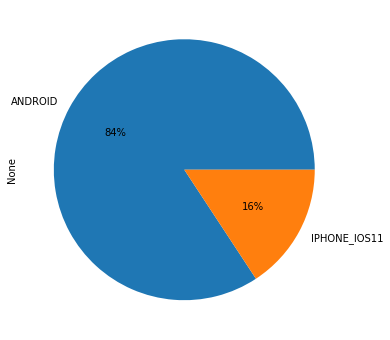

In [18]:
#osMobileOS pie chart
osMobileOS[osMobileOS.columns[0:]].sum().plot(kind='pie', figsize=(6,6), autopct='%1.0f%%', subplots=False); plt.show();

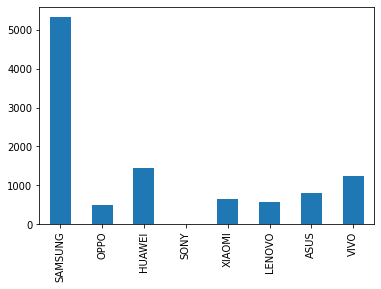

In [19]:
#newMobileOS pie chart
newMobileOS[newMobileOS.columns[0:]].sum().plot(kind='bar', y=''); plt.show();

In [20]:
#user mobile data - bankInfo & mobile OS left join
userMobile = bankInfo.merge(mobileOS, on='BANK_ID', how='left', indicator=True);
print(userMobile.head(5));

   BANK_ID  AGE MARITAL_STATUS  GENDER                      EDUCATION  \
0    13398   42         Single    Male  No Formal Education / Unknown   
1    16152   37        Married    Male  No Formal Education / Unknown   
2    18560   34         Single    Male  No Formal Education / Unknown   
3    18568   34        Married    Male            College/ University   
4    26717   26         Single  Female                            NaN   

                          STATE  \
0          Selangor Darul Ehsan   
1  Negeri Sembilan Darul Khusus   
2  Negeri Sembilan Darul Khusus   
3          Selangor Darul Ehsan   
4              Kedah Darul Aman   

                                          OCCUPATION               OCC_DESC  \
0  Associate Professionals, Administrative/Specia...  MANAGER OR SUPERVISOR   
1  Associate Professionals/Technician/Asst/Superv...                 OTHERS   
2  Clerical Support Workers, Office - General Off...          NON-EXECUTIVE   
3  Associate Professionals/Technic